In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv("abalone_0509.csv")
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Weight
0,1,91.0,73.0,19.0,102.8,44.9,20.2,30.0,15,95.1
1,1,70.0,53.0,18.0,45.1,19.9,9.7,14.0,7,43.6
2,2,106.0,84.0,27.0,135.4,51.3,28.3,42.0,9,121.6
3,1,88.0,73.0,25.0,103.2,43.1,22.8,31.0,10,96.9
4,0,66.0,51.0,16.0,41.0,17.9,7.9,11.0,7,36.8
...,...,...,...,...,...,...,...,...,...,...
4014,2,113.0,90.0,33.0,177.4,74.0,47.8,49.8,11,171.6
4015,1,118.0,88.0,27.0,193.2,87.8,42.9,52.1,10,182.8
4016,1,120.0,95.0,41.0,235.2,105.1,57.5,61.6,9,224.2
4017,2,125.0,97.0,30.0,218.9,106.2,52.2,59.2,10,217.6


In [3]:
data['adult']=np.where(data.Sex==0,1,
                      np.where(data.Sex==2,1,0))

In [4]:
data.rename(columns={'Whole weight':'Whole_weight'},inplace=True)
data.rename(columns={'Shucked weight':'Shucked_weight'},inplace=True)
data.rename(columns={'Viscera weight':'Viscera_weight'},inplace=True)
data.rename(columns={'Shell weight':'Shell_weight'},inplace=True)
data.rename(columns={'Weight':'Sum_weight'},inplace=True)

In [5]:
data

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sum_weight,adult
0,1,91.0,73.0,19.0,102.8,44.9,20.2,30.0,15,95.1,0
1,1,70.0,53.0,18.0,45.1,19.9,9.7,14.0,7,43.6,0
2,2,106.0,84.0,27.0,135.4,51.3,28.3,42.0,9,121.6,1
3,1,88.0,73.0,25.0,103.2,43.1,22.8,31.0,10,96.9,0
4,0,66.0,51.0,16.0,41.0,17.9,7.9,11.0,7,36.8,1
...,...,...,...,...,...,...,...,...,...,...,...
4014,2,113.0,90.0,33.0,177.4,74.0,47.8,49.8,11,171.6,1
4015,1,118.0,88.0,27.0,193.2,87.8,42.9,52.1,10,182.8,0
4016,1,120.0,95.0,41.0,235.2,105.1,57.5,61.6,9,224.2,0
4017,2,125.0,97.0,30.0,218.9,106.2,52.2,59.2,10,217.6,1


In [50]:
np.min(data.ratio_AV)

0.24999999999999994

In [6]:
#전복은 전체적인 모양이 타원반구에 가깝다고 판단하여 반구의 부피를 구하는 공식으로 길이관련 변수들 변형하자 생각
#전복의 수분 함유량도 변수로 생성(moisture)-제품의 질과 관련될 것으로 예상

In [7]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
model =ols('Rings ~ Length + Diameter + Height + Whole_weight + Shucked_weight + Viscera_weight + Shell_weight + adult',data)

In [9]:
pd.DataFrame({'변수':column, 'VIF': variance_inflation_factor(model.exog,i)}
            for i, column in enumerate(model.exog_names)
            if column != 'Intercept')

,변수,VIF
0,Length,41.730787
1,Diameter,42.793969
2,Height,6.779763
3,Whole_weight,143.285951
4,Shucked_weight,35.711562
5,Viscera_weight,19.420409
6,Shell_weight,26.192428
7,adult,1.069198


In [10]:
model1 =ols('Rings ~ Length + Diameter + Height + Sum_weight + adult',data)

In [11]:
pd.DataFrame({'변수':column, 'VIF': variance_inflation_factor(model1.exog,i)}
            for i, column in enumerate(model1.exog_names)
            if column != 'Intercept')

,변수,VIF
0,Length,40.721408
1,Diameter,41.705858
2,Height,6.138045
3,Sum_weight,8.312615
4,adult,1.067194


In [12]:
data['moisture']=data.Whole_weight-data.Sum_weight

In [13]:
data

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sum_weight,adult,moisture
0,1,91.0,73.0,19.0,102.8,44.9,20.2,30.0,15,95.1,0,7.7
1,1,70.0,53.0,18.0,45.1,19.9,9.7,14.0,7,43.6,0,1.5
2,2,106.0,84.0,27.0,135.4,51.3,28.3,42.0,9,121.6,1,13.8
3,1,88.0,73.0,25.0,103.2,43.1,22.8,31.0,10,96.9,0,6.3
4,0,66.0,51.0,16.0,41.0,17.9,7.9,11.0,7,36.8,1,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...
4014,2,113.0,90.0,33.0,177.4,74.0,47.8,49.8,11,171.6,1,5.8
4015,1,118.0,88.0,27.0,193.2,87.8,42.9,52.1,10,182.8,0,10.4
4016,1,120.0,95.0,41.0,235.2,105.1,57.5,61.6,9,224.2,0,11.0
4017,2,125.0,97.0,30.0,218.9,106.2,52.2,59.2,10,217.6,1,1.3


In [14]:
model2 =ols('Rings ~ Length + Diameter + Height + Sum_weight+ moisture + adult',data)

In [15]:
pd.DataFrame({'변수':column, 'VIF': variance_inflation_factor(model2.exog,i)}
            for i, column in enumerate(model2.exog_names)
            if column != 'Intercept')

,변수,VIF
0,Length,40.907828
1,Diameter,41.854776
2,Height,6.204068
3,Sum_weight,8.654882
4,moisture,1.607306
5,adult,1.067293


In [16]:
print((2/3)*3.14*data.Length/2*data.Diameter/2*data.Height/2)

0        33026.781667
1        17474.100000
2        62906.760000
3        42023.666667
4        14092.320000
            ...      
4014     87817.950000
4015     73362.960000
4016    122303.000000
4017     95181.250000
4018    160851.210000
Length: 4019, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x1eb77db4730>,
 'caps': [<matplotlib.lines.Line2D at 0x1eb77db4df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eb77db43d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1eb77dc94f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eb77dc9850>],
 'means': []}

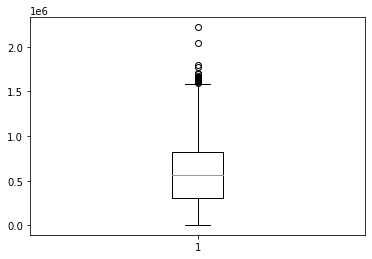

In [17]:
plt.boxplot((2/3)*3.14*data.Length*data.Diameter*data.Height)

(array([689., 875., 878., 781., 480., 217.,  72.,  24.,   1.,   2.]),
 array([   4766.52      ,  226078.53466667,  447390.54933333,
         668702.564     ,  890014.57866667, 1111326.59333333,
        1332638.608     , 1553950.62266667, 1775262.63733333,
        1996574.652     , 2217886.66666667]),
 <BarContainer object of 10 artists>)

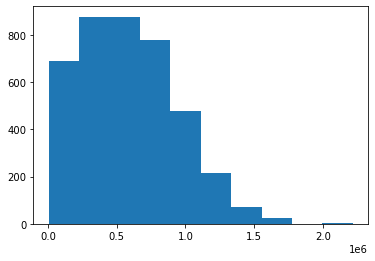

In [18]:
plt.hist((2/3)*3.14*data.Length*data.Diameter*data.Height)

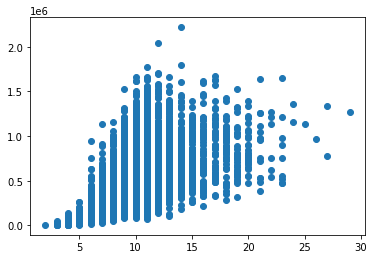

In [19]:
plt.scatter(data.Rings,(2/3)*3.14*data.Length*data.Diameter*data.Height)

In [20]:
data['Volume']=(2/3)*3.14*(data.Length/2)*(data.Diameter/2)*(data.Height/2)

In [21]:
model3 =ols('Rings ~ Volume + moisture + adult',data)

In [22]:
pd.DataFrame({'변수':column, 'VIF': variance_inflation_factor(model3.exog,i)}
            for i, column in enumerate(model3.exog_names)
            if column != 'Intercept')

,변수,VIF
0,Volume,1.704193
1,moisture,1.652911
2,adult,1.053639


In [23]:
data[['Volume','moisture','adult']].corr()

,Volume,moisture,adult
Volume,1.000000,0.628478,-0.225551
moisture,0.628478,1.000000,-0.146378
adult,-0.225551,-0.146378,1.000000


In [24]:
data

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sum_weight,adult,moisture,Volume
0,1,91.0,73.0,19.0,102.8,44.9,20.2,30.0,15,95.1,0,7.7,33026.781667
1,1,70.0,53.0,18.0,45.1,19.9,9.7,14.0,7,43.6,0,1.5,17474.100000
2,2,106.0,84.0,27.0,135.4,51.3,28.3,42.0,9,121.6,1,13.8,62906.760000
3,1,88.0,73.0,25.0,103.2,43.1,22.8,31.0,10,96.9,0,6.3,42023.666667
4,0,66.0,51.0,16.0,41.0,17.9,7.9,11.0,7,36.8,1,4.2,14092.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4014,2,113.0,90.0,33.0,177.4,74.0,47.8,49.8,11,171.6,1,5.8,87817.950000
4015,1,118.0,88.0,27.0,193.2,87.8,42.9,52.1,10,182.8,0,10.4,73362.960000
4016,1,120.0,95.0,41.0,235.2,105.1,57.5,61.6,9,224.2,0,11.0,122303.000000
4017,2,125.0,97.0,30.0,218.9,106.2,52.2,59.2,10,217.6,1,1.3,95181.250000


In [59]:
data['area']=(data.Length/2)*(data.Diameter/2)*3.14

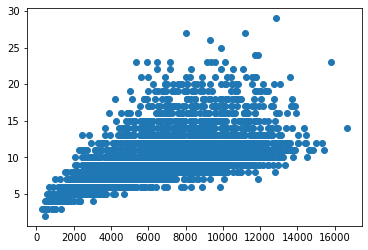

In [60]:
plt.scatter(data.area,data.Rings)

In [61]:
#면적-부피 비율 변수는?

In [62]:
data['ratio_AV']=data.Volume/data.area

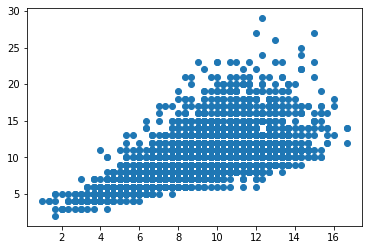

In [63]:
plt.scatter(data.ratio_AV,data.Rings)

In [64]:
model4 =ols('Rings ~ ratio_AV + Whole_weight + moisture + adult',data)

In [65]:
pd.DataFrame({'변수':column, 'VIF': variance_inflation_factor(model4.exog,i)}
            for i, column in enumerate(model4.exog_names)
            if column != 'Intercept')

,변수,VIF
0,ratio_AV,4.792692
1,Whole_weight,5.864529
2,moisture,1.832742
3,adult,1.066441


In [66]:
model5 =ols('Rings ~Volume+ ratio_AV + Whole_weight + moisture + adult',data)

In [67]:
pd.DataFrame({'변수':column, 'VIF': variance_inflation_factor(model5.exog,i)}
            for i, column in enumerate(model5.exog_names)
            if column != 'Intercept')

,변수,VIF
0,Volume,30.747270
1,ratio_AV,8.503408
2,Whole_weight,20.425739
3,moisture,1.866149
4,adult,1.078264


In [68]:
data[['Volume','area','Height','ratio_AV','moisture']].corr()
#면적당 부피 비율이 가장 RIngs와 상관관계가 높음

,Volume,area,Height,ratio_AV,moisture
Volume,1.000000,0.968946,0.935693,0.935693,0.628478
area,0.968946,1.000000,0.897649,0.897649,0.602263
Height,0.935693,0.897649,1.000000,1.000000,0.579870
ratio_AV,0.935693,0.897649,1.000000,1.000000,0.579870
moisture,0.628478,0.602263,0.579870,0.579870,1.000000


In [69]:
data

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sum_weight,adult,moisture,Volume,area,ratio_AV
0,1,91.0,73.0,19.0,102.8,44.9,20.2,30.0,15,95.1,0,7.7,33026.781667,5214.755,6.333333
1,1,70.0,53.0,18.0,45.1,19.9,9.7,14.0,7,43.6,0,1.5,17474.100000,2912.350,6.000000
2,2,106.0,84.0,27.0,135.4,51.3,28.3,42.0,9,121.6,1,13.8,62906.760000,6989.640,9.000000
3,1,88.0,73.0,25.0,103.2,43.1,22.8,31.0,10,96.9,0,6.3,42023.666667,5042.840,8.333333
4,0,66.0,51.0,16.0,41.0,17.9,7.9,11.0,7,36.8,1,4.2,14092.320000,2642.310,5.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4014,2,113.0,90.0,33.0,177.4,74.0,47.8,49.8,11,171.6,1,5.8,87817.950000,7983.450,11.000000
4015,1,118.0,88.0,27.0,193.2,87.8,42.9,52.1,10,182.8,0,10.4,73362.960000,8151.440,9.000000
4016,1,120.0,95.0,41.0,235.2,105.1,57.5,61.6,9,224.2,0,11.0,122303.000000,8949.000,13.666667
4017,2,125.0,97.0,30.0,218.9,106.2,52.2,59.2,10,217.6,1,1.3,95181.250000,9518.125,10.000000


In [80]:
data['density']=data.Whole_weight/data.Volume

In [70]:
model6 =ols('Rings ~ Length + ratio_AV + Whole_weight + moisture + adult',data)

In [71]:
pd.DataFrame({'변수':column, 'VIF': variance_inflation_factor(model6.exog,i)}
            for i, column in enumerate(model6.exog_names)
            if column != 'Intercept')

,변수,VIF
0,Length,9.109672
1,ratio_AV,5.952439
2,Whole_weight,9.932161
3,moisture,1.901100
4,adult,1.066523


In [72]:
model6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     599.8
Date:                Sun, 15 May 2022   Prob (F-statistic):               0.00
Time:                        17:39:01   Log-Likelihood:                -9282.7
No. Observations:                4019   AIC:                         1.858e+04
Df Residuals:                    4013   BIC:                         1.862e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.6841      0.321      5.242      0.000       1.054       2.314
Length           0.0259      0.005      5.266      0.000       0.016       0.036
ratio_AV         0.7395      0.037     19.872      0.000       0.667       0.812
Whole_weight    -0.0135      0.001    -10.847      0.000      -0.016      -0.011
moisture         0.1055      0.005     21.320      0.000       0.096       0.115
adult           -0.3073      0.082     -3.734      0.000      -0.469      -0.146
==============================================================================
Omnibus:                     1032.208   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3083.528
Skew:                           1.319   Prob(JB):                         0.00
Kurtosis:                       6.384   Cond. No.                     1.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
model7 =ols('Rings ~Volume + density + moisture + adult',data)

In [86]:
pd.DataFrame({'변수':column, 'VIF': variance_inflation_factor(model7.exog,i)}
            for i, column in enumerate(model7.exog_names)
            if column != 'Intercept')

,변수,VIF
0,Volume,1.985759
1,density,1.166262
2,moisture,1.776726
3,adult,1.060532


In [ ]:
print(np.min(data.ratio_AV,))

In [87]:
model7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     585.4
Date:                Sun, 15 May 2022   Prob (F-statistic):               0.00
Time:                        17:46:30   Log-Likelihood:                -9480.6
No. Observations:                4019   AIC:                         1.897e+04
Df Residuals:                    4014   BIC:                         1.900e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2236      0.323     31.617      0.000       9.590      10.858
Volume      2.062e-05   1.31e-06     15.716      0.000     1.8e-05    2.32e-05
density    -1104.8572    118.925     -9.290      0.000   -1338.016    -871.699
moisture       0.1043      0.005     20.751      0.000       0.094       0.114
adult         -0.4113      0.086     -4.771      0.000      -0.580      -0.242
==============================================================================
Omnibus:                      993.158   Durbin-Watson:                   1.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2819.856
Skew:                           1.289   Prob(JB):                         0.00
Kurtosis:                       6.193   Cond. No.                     2.51e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     492.9
Date:                Sun, 15 May 2022   Prob (F-statistic):               0.00
Time:                        16:48:26   Log-Likelihood:                -9442.0
No. Observations:                4019   AIC:                         1.890e+04
Df Residuals:                    4013   BIC:                         1.893e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4908      0.334      4.461      0.000       0.836       2.146
Length        -0.0591      0.011     -5.456      0.000      -0.080      -0.038
Diameter       0.1136      0.013      8.577      0.000       0.088       0.140
Height         0.2526      0.013     19.275      0.000       0.227       0.278
Sum_weight    -0.0094      0.001     -7.420      0.000      -0.012      -0.007
adult         -0.2745      0.086     -3.205      0.001      -0.442      -0.107
==============================================================================
Omnibus:                     1260.619   Durbin-Watson:                   1.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4083.738
Skew:                           1.589   Prob(JB):                         0.00
Kurtosis:                       6.780   Cond. No.                     1.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

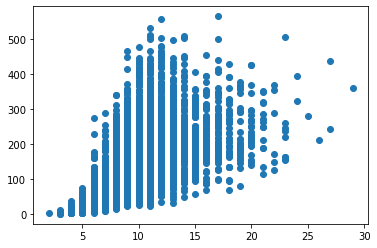

In [42]:
plt.scatter(data.Rings,data.Whole_weight)

In [88]:
data

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sum_weight,adult,moisture,Volume,area,ratio_AV,density
0,1,91.0,73.0,19.0,102.8,44.9,20.2,30.0,15,95.1,0,7.7,33026.781667,5214.755,6.333333,0.003113
1,1,70.0,53.0,18.0,45.1,19.9,9.7,14.0,7,43.6,0,1.5,17474.100000,2912.350,6.000000,0.002581
2,2,106.0,84.0,27.0,135.4,51.3,28.3,42.0,9,121.6,1,13.8,62906.760000,6989.640,9.000000,0.002152
3,1,88.0,73.0,25.0,103.2,43.1,22.8,31.0,10,96.9,0,6.3,42023.666667,5042.840,8.333333,0.002456
4,0,66.0,51.0,16.0,41.0,17.9,7.9,11.0,7,36.8,1,4.2,14092.320000,2642.310,5.333333,0.002909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4014,2,113.0,90.0,33.0,177.4,74.0,47.8,49.8,11,171.6,1,5.8,87817.950000,7983.450,11.000000,0.002020
4015,1,118.0,88.0,27.0,193.2,87.8,42.9,52.1,10,182.8,0,10.4,73362.960000,8151.440,9.000000,0.002633
4016,1,120.0,95.0,41.0,235.2,105.1,57.5,61.6,9,224.2,0,11.0,122303.000000,8949.000,13.666667,0.001923
4017,2,125.0,97.0,30.0,218.9,106.2,52.2,59.2,10,217.6,1,1.3,95181.250000,9518.125,10.000000,0.002300


In [89]:
data.to_csv("abalone_220515.csv")

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
model7 =ols('Rings ~Volume + density + moisture + adult',data)
model7.fit().summary()